# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [ ]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

In [ ]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

In [ ]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

In [ ]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

In [ ]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

In [ ]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

In [ ]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

In [87]:
from scipy import misc
import os
import numpy as np
import matplotlib.pyplot as plt

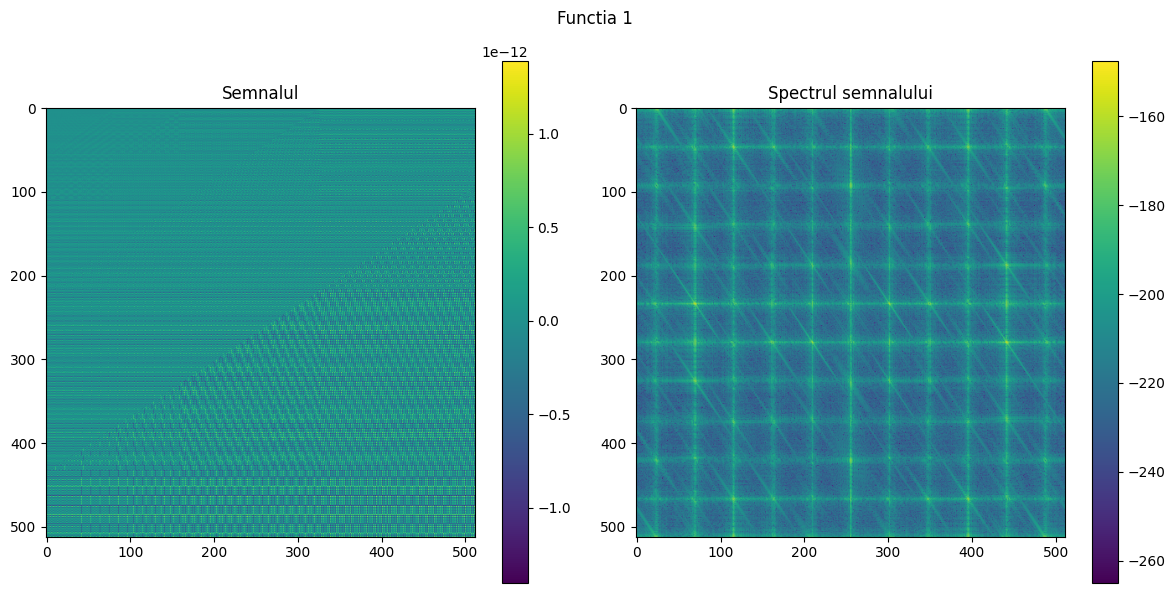

In [88]:
# Exercitiul 1 - 1
def func1(n1, n2):
    return np.sin(2 * np.pi * n1 + 3 * np.pi * n2)

dim = 512
n1, n2 = np.meshgrid(range(dim), range(dim))

X = func1(n1, n2)
Y = np.fft.fftshift(np.fft.fft2(X))
freq_db = 20*np.log10(abs(Y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Functia 1')

img = axs[0].imshow(X)
axs[0].set_title("Semnalul")
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(freq_db)
axs[1].set_title("Spectrul semnalului")
fig.colorbar(img, ax=axs[1])

plt.tight_layout()

if not os.path.exists('ex1'):
    os.mkdir('ex1')

plt.savefig(os.path.join('ex1', f"ex1_func1.png"))
plt.savefig(os.path.join('ex1', f"ex1_func1.pdf"))
plt.show()

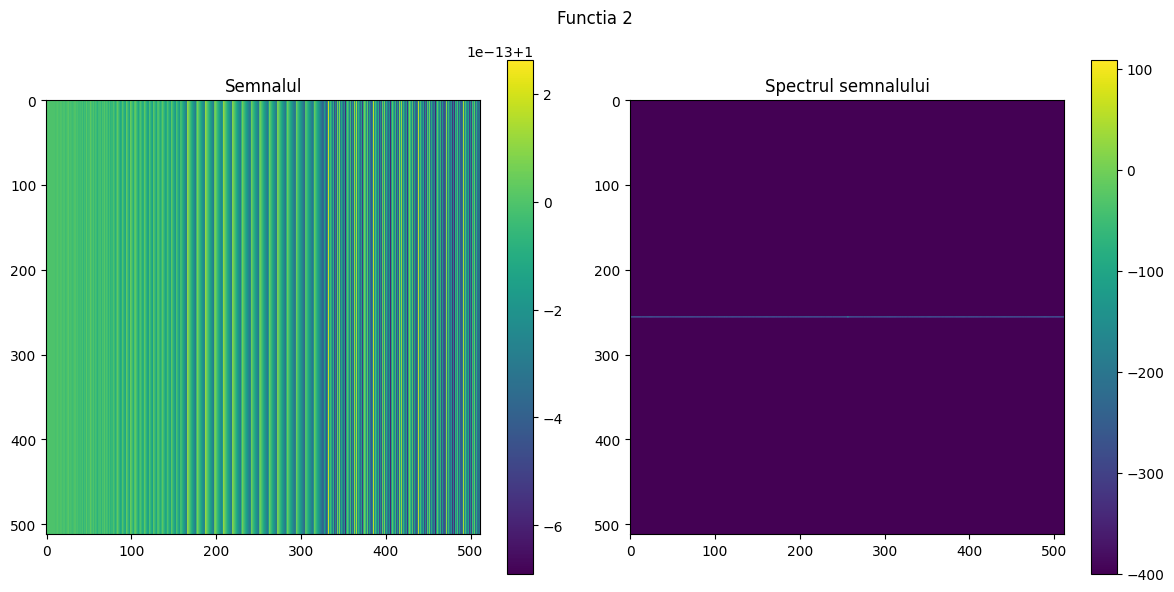

In [89]:
# Exercitiul 1 - 2
def func2(n1, n2):
    return np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)

dim = 512
n1, n2 = np.meshgrid(range(dim), range(dim))

X = func2(n1, n2)
Y = np.fft.fftshift(np.fft.fft2(X))
freq_db = 20*np.log10(abs(Y + 1e-20))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Functia 2')

img = axs[0].imshow(X)
axs[0].set_title("Semnalul")
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(freq_db)
axs[1].set_title("Spectrul semnalului")
fig.colorbar(img, ax=axs[1])

plt.tight_layout()

if not os.path.exists('ex1'):
    os.mkdir('ex1')

plt.savefig(os.path.join('ex1', f"ex1_func2.png"))
plt.savefig(os.path.join('ex1', f"ex1_func2.pdf"))
plt.show()

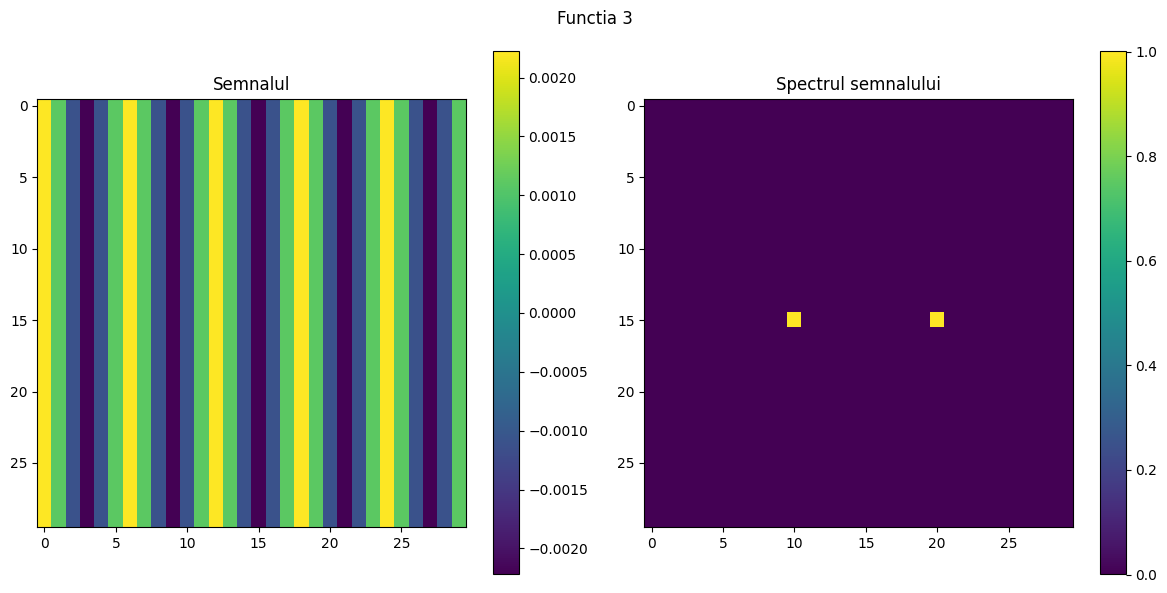

In [90]:
# Exercitiul 1 - 3
dim = 30

Y = np.zeros((dim, dim), dtype=complex)
Y[0, 5] = 1
Y[0, dim - 5] = 1

X = np.real(np.fft.ifft2(Y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Functia 3')

img = axs[0].imshow(X)
axs[0].set_title("Semnalul")
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(np.abs(np.fft.fftshift(Y)) + 1e-15)
axs[1].set_title("Spectrul semnalului")
fig.colorbar(img, ax=axs[1])

plt.tight_layout()

if not os.path.exists('ex1'):
    os.mkdir('ex1')

plt.savefig(os.path.join('ex1', f"ex1_func3.png"))
plt.savefig(os.path.join('ex1', f"ex1_func3.pdf"))
plt.show()

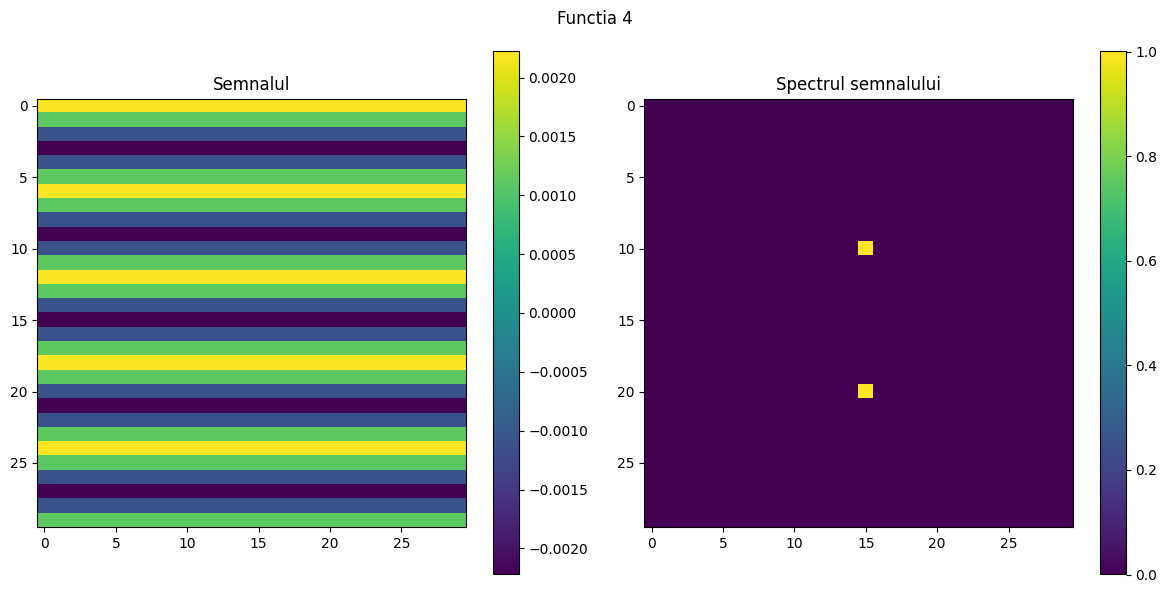

In [91]:
# Exercitiul 1 - 4
dim = 30

Y = np.zeros((dim, dim), dtype=complex)
Y[5, 0] = 1
Y[dim - 5, 0] = 1

X = np.real(np.fft.ifft2(Y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Functia 4')

img = axs[0].imshow(X)
axs[0].set_title("Semnalul")
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(np.abs(np.fft.fftshift(Y)) + 1e-15)
axs[1].set_title("Spectrul semnalului")
fig.colorbar(img, ax=axs[1])

plt.tight_layout()

if not os.path.exists('ex1'):
    os.mkdir('ex1')

plt.savefig(os.path.join('ex1', f"ex1_func4.png"))
plt.savefig(os.path.join('ex1', f"ex1_func4.pdf"))
plt.show()

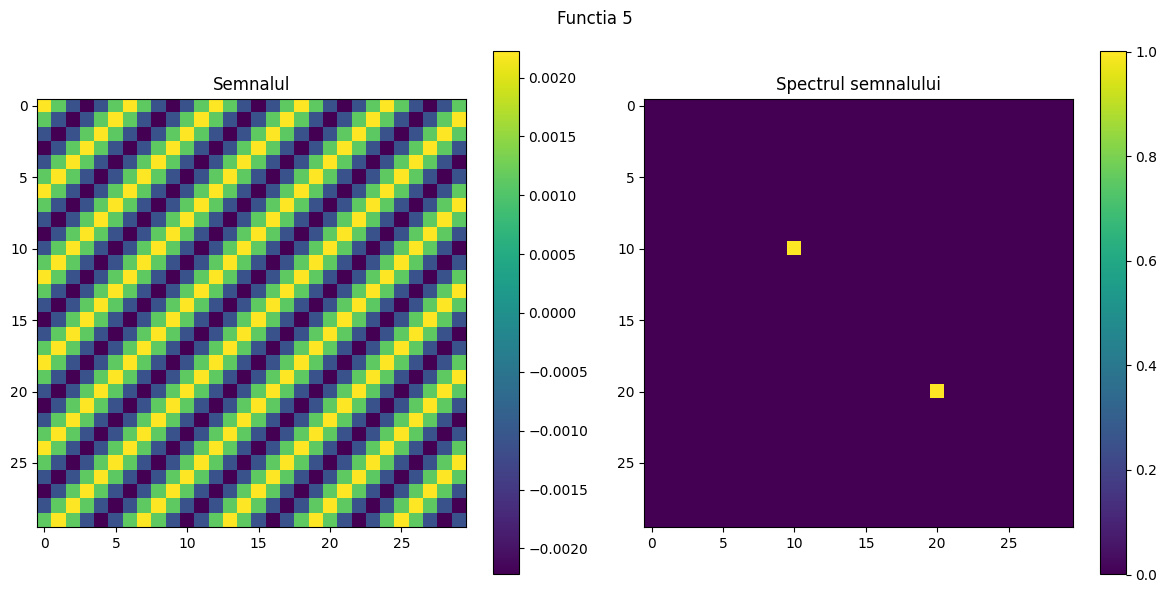

In [92]:
# Exercitiul 1 - 5
dim = 30

Y = np.zeros((dim, dim), dtype=complex)
Y[5, 5] = 1
Y[dim - 5, dim - 5] = 1

X = np.real(np.fft.ifft2(Y))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Functia 5')

img = axs[0].imshow(X)
axs[0].set_title("Semnalul")
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(np.abs(np.fft.fftshift(Y)) + 1e-15)
axs[1].set_title("Spectrul semnalului")
fig.colorbar(img, ax=axs[1])

plt.tight_layout()

if not os.path.exists('ex1'):
    os.mkdir('ex1')

plt.savefig(os.path.join('ex1', f"ex1_func5.png"))
plt.savefig(os.path.join('ex1', f"ex1_func5.pdf"))
plt.show()

/var/folders/z6/zcyc3cm17zn12jdk2nl54qt40000gp/T/ipykernel_53053/126511550.py:15: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)
/var/folders/z6/zcyc3cm17zn12jdk2nl54qt40000gp/T/ipykernel_53053/126511550.py:16: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X_cutoff = misc.face(gray=True)


3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
3.9274492081310326e+29
0.008263167164471698
0.008263167164471698
0.007591810950680714
0.00718739686718011


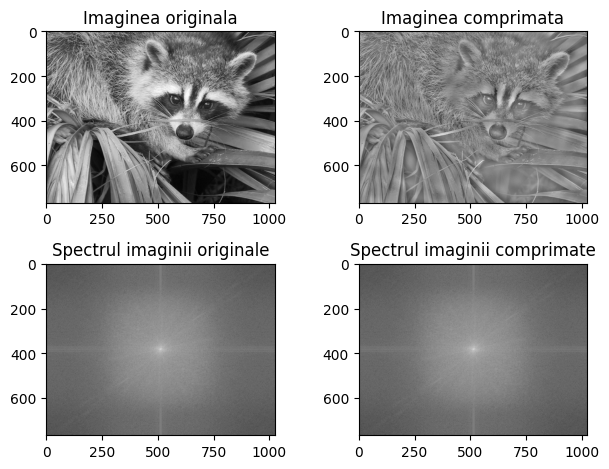

In [93]:
# Exercitiul 2
def high_freq_attenuation(X, freq_cutoff):
    Y = np.fft.fft2(X)
    Y_cutoff = Y.copy()
    
    freq_db = 20 * np.log10(abs(Y + 1e-15))
    Y_cutoff[freq_db > freq_cutoff] = 0
    
    return np.real(np.fft.ifft2(Y_cutoff))

SNR = np.inf
SNR_threshold = 0.0072
freq_cuttof = 300

X = misc.face(gray=True)
X_cutoff = misc.face(gray=True)

while SNR > SNR_threshold:
    X_compressed = high_freq_attenuation(X_cutoff, freq_cuttof)
    SNR = np.sum(X ** 2) / np.sum(np.abs(X - X_compressed) ** 2)
    freq_cuttof -= 10
    print(SNR)

Y = np.fft.fft2(X)
Y_compressed = np.fft.fft2(X_cutoff)

fig, axs = plt.subplots(2, 2)
freq_db = 20 * np.log10(abs(Y + 1e-15))

# Imaginea originala

axs[0][0].imshow(X, cmap='gray')
axs[0][0].set_title("Imaginea originala")
axs[1][0].imshow(np.fft.fftshift(freq_db), cmap='gray')
axs[1][0].set_title("Spectrul imaginii originale")

# Imaginea comprimata

freq_db = 20 * np.log10(abs(Y_compressed + 1e-15))

axs[0][1].imshow(X_compressed, cmap='gray')
axs[0][1].set_title("Imaginea comprimata")
axs[1][1].imshow(np.fft.fftshift(freq_db), cmap='gray')
axs[1][1].set_title("Spectrul imaginii comprimate")
plt.tight_layout()

if not os.path.exists('ex2'):
    os.mkdir('ex2')

plt.savefig(os.path.join('ex2', f"ex2.png"))
plt.savefig(os.path.join('ex2', f"ex2.pdf"))

plt.show()

/var/folders/z6/zcyc3cm17zn12jdk2nl54qt40000gp/T/ipykernel_53053/2316664879.py:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


SNR inainte de filtrare: 0.00792014154216435


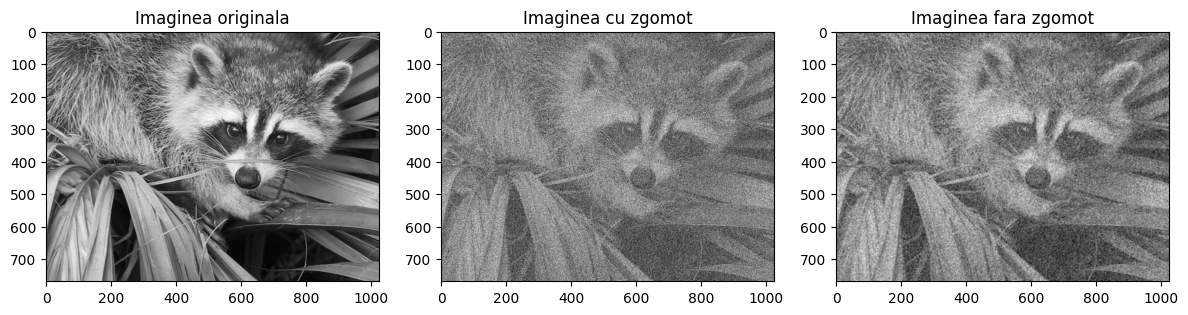

SNR dupa filtrare: 0.0950678032867564


In [94]:
# Exercitiul 3
from scipy.ndimage import gaussian_filter

pixel_noise = 200
noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)

X = misc.face(gray=True)
X_noisy = X + noise
X_denoised = gaussian_filter(X_noisy, sigma=1)

print(f"SNR inainte de filtrare: {np.sum(X**2) / np.sum((X - X_noisy)**2)}")

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(X, cmap=plt.cm.gray)
axs[0].set_title("Imaginea originala")

axs[1].imshow(X_noisy, cmap=plt.cm.gray)
axs[1].set_title("Imaginea cu zgomot")

axs[2].imshow(X_denoised, cmap=plt.cm.gray)
axs[2].set_title("Imaginea fara zgomot")

plt.tight_layout()

if not os.path.exists('ex3'):
    os.mkdir('ex3')
    
plt.savefig(os.path.join('ex3', f"ex3.png"))
plt.savefig(os.path.join('ex3', f"ex3.pdf"))

plt.show()

print(f"SNR dupa filtrare: {np.sum(X**2) / np.sum((X - X_denoised)**2)}")

In [ ]:
# Exercitiul 4
# TBD